<h3>Problem:</h3>
<p>Let’s assume that a hobby botanist is interested in distinguishing the species of some
iris flowers that she has found. She has collected some measurements associated with
each iris: the length and width of the petals and the length and width of the sepals, all
measured in centimeters (see Figure).</p>
<p><img src="img/sample_flower.jpg" height=200 width=200 align=left></img></p>
<p>She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species setosa, versicolor, or virginica. For these
measurements, she can be certain of which species each iris belongs to. Let’s assume
that these are the only species our hobby botanist will encounter in the wild.</p>
<h3>Objective:</h3>
<p>Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

In [2]:
irisDS= load_iris()

In [3]:
irisDS

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
irisDS.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print("Keys of iris datasets:\n{}".format(irisDS.keys()))

Keys of iris datasets:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print("Features name in iris datasets:\n{}".format(irisDS.feature_names))

Features name in iris datasets:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(irisDS['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
print("Target name in iris datasets:\n{}".format(irisDS.target_names))

Target name in iris datasets:
['setosa' 'versicolor' 'virginica']


In [9]:
print("Type of data: {}".format(type(irisDS['data'])))

Type of data: <class 'numpy.ndarray'>


In [10]:
print("Shape of data: {}".format(irisDS['data'].shape))

Shape of data: (150, 4)


In [11]:
print("First five columns of data:\n{}".format(irisDS['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
print("Type of target: {}".format(type(irisDS['target'])))

Type of target: <class 'numpy.ndarray'>


In [13]:
print("Shape of target: {}".format(irisDS['target'].shape))

Shape of target: (150,)


```The meanings of the numbers are given by the iris['target_names'] array:
0 means setosa, 1 means versicolor, and 2 means virginica.```

In [14]:
print("Target:\n{}".format(irisDS['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
irisDF=pd.DataFrame(np.c_[irisDS['data'], irisDS['target']], columns = np.append(irisDS['feature_names'], ['target']))

In [16]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
irisDF.shape

(150, 5)

In [18]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# STEP #2: Visualize DATA

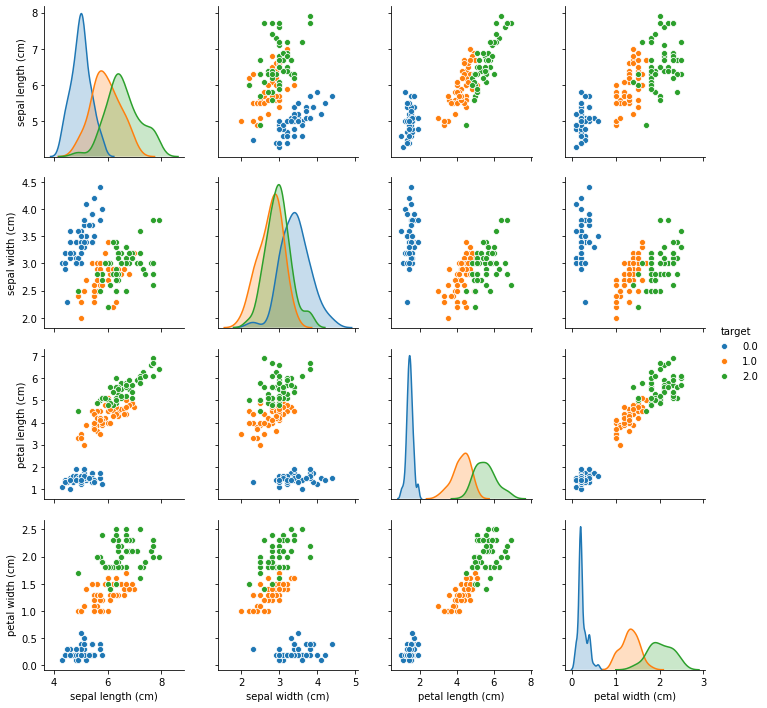

In [19]:
sns.pairplot(irisDF, vars=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'],hue='target')

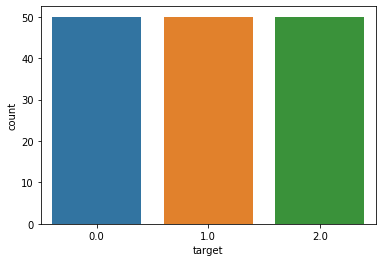

In [20]:
sns.countplot(irisDF['target'])

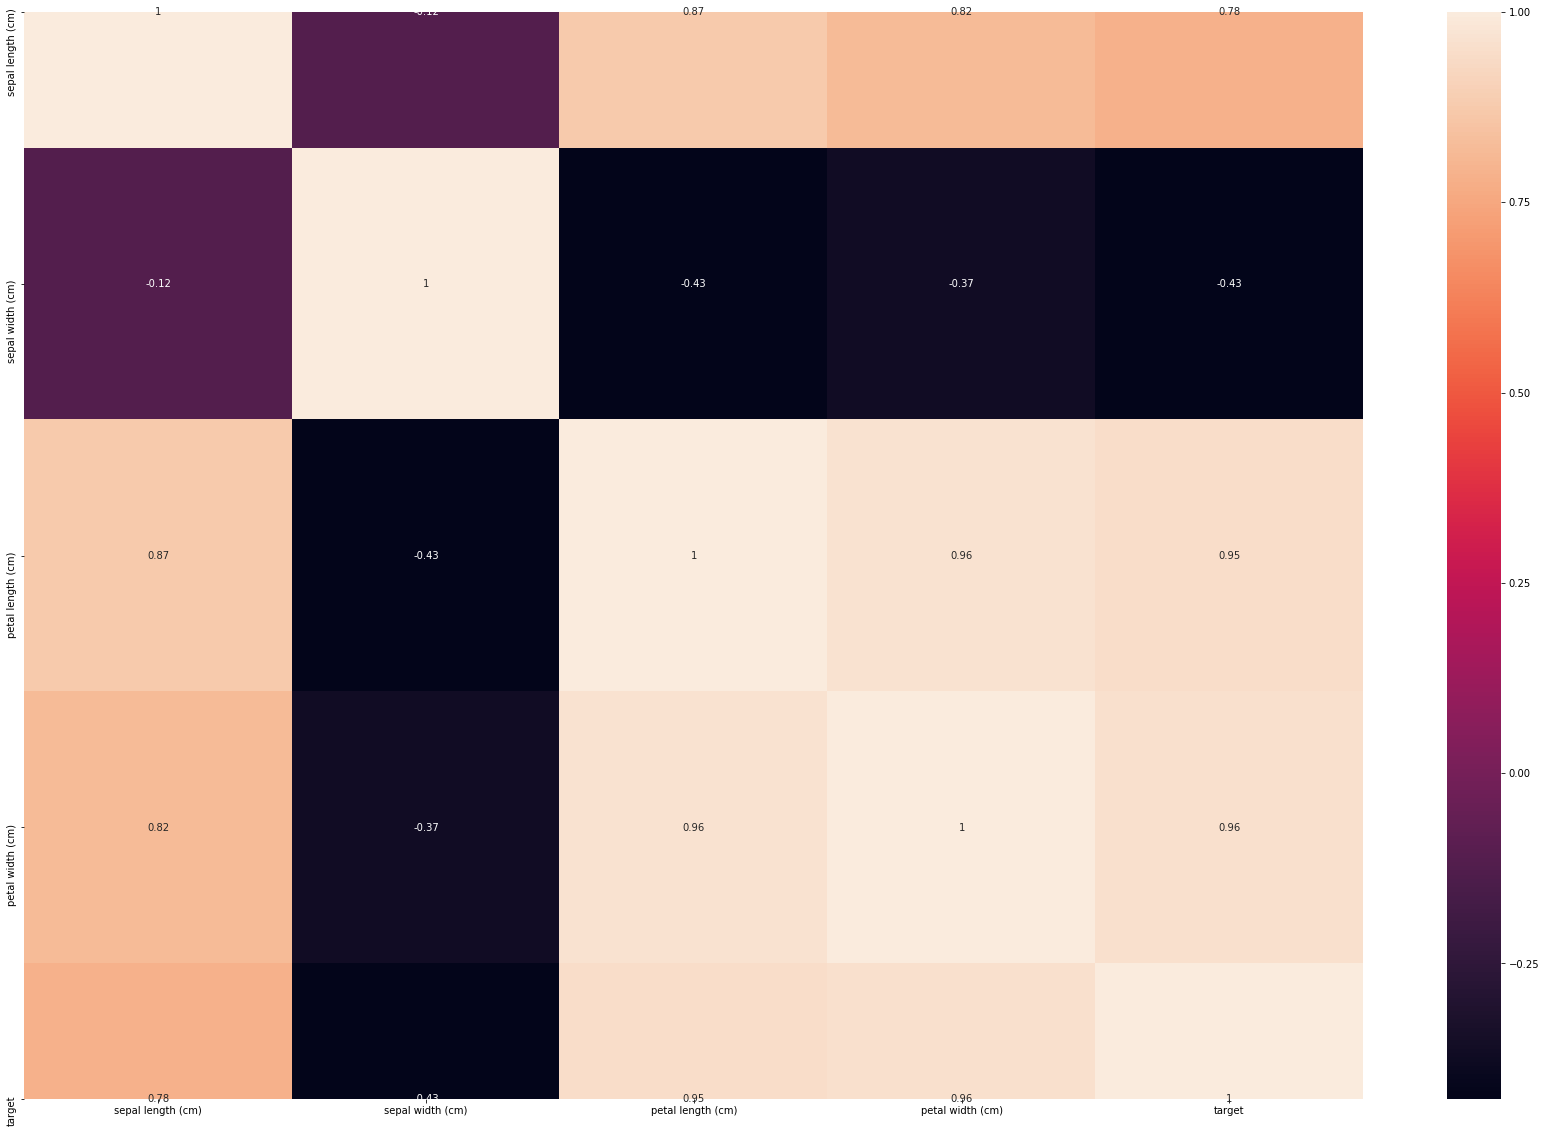

In [21]:
plt.figure(figsize=(30,20))
sns.heatmap(irisDF.corr(), annot=True)

# STEP #3: Model Training (Finding a problem solution)

In [22]:
x=irisDF.drop(['target'],axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y=irisDF['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

### Create Test and train data

```The output of the train_test_split function is X_train, X_test, y_train, and y_test, which are all NumPy arrays. X_train contains 70% of the rows of the dataset, and X_test contains the remaining 30% by default is train and test splitted in 75/25 ratio```

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [27]:
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,5.1,3.4,1.5,0.2
53,5.5,2.3,4.0,1.3
79,5.7,2.6,3.5,1.0
10,5.4,3.7,1.5,0.2
50,7.0,3.2,4.7,1.4


In [28]:
y_train.head()

39    0.0
53    1.0
79    1.0
10    0.0
50    1.0
Name: target, dtype: float64

In [30]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
82,5.8,2.7,3.9,1.2
134,6.1,2.6,5.6,1.4
114,5.8,2.8,5.1,2.4
42,4.4,3.2,1.3,0.2
109,7.2,3.6,6.1,2.5


In [31]:
y_test.head()

82     1.0
134    2.0
114    2.0
42     0.0
109    2.0
Name: target, dtype: float64

In [32]:
from sklearn.svm import SVC

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
svc_model1=SVC()

In [35]:
svc_model1.fit(x_train,y_train)

c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# STEP #4: Evaluating Model

In [36]:
y_predict=svc_model1.predict(x_test)

In [37]:
y_predict

array([1., 2., 2., 0., 2., 1., 0., 2., 0., 1., 1., 2., 2., 2., 0., 0., 2.,
       2., 0., 0., 1., 2., 0., 1., 1., 2., 1., 1., 1., 2.])

>since prediction is not perfect giving all as one we have to improve the model. We can use confusion matrix to check false positive status


![Confusion Matrix](./img/ConfusionMatrix.png)

**A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.**

From below matrix all are either false positive(Observation is negative, but is predicted positive.) or false negative(Observation is positive, but is predicted negative)

In [38]:
cm=confusion_matrix(y_test,y_predict)

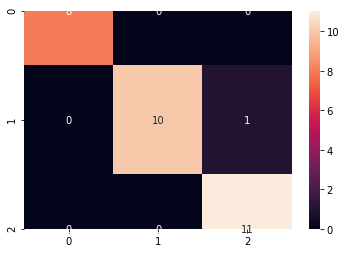

In [39]:
sns.heatmap(cm,annot = True)

```For above problem one of the solution is to do Data Normalization```

one of the step to perform is unity base normalization: Where we want to get all data to be between 0 and 1 
<img src="./img/normal.JPG" alt="Markdown Monster icon" height="600" width="600" style="float: left; margin-right: 10px; s" />

Next optimization is to perform SVM Parameter optimization:
Two key parameters that we can actually optimize during the process which is 'c' parameter and γ(gamma) parameter
#### C parameter: 
Controls trade-off between classifying training points correctly and having a smooth decision boundry
- **Small c(loose)** make cost (penalty) of misclassification low (soft margin).
- **Large C(strict)** make cost of misclassification high (hard margin), forcing the model to explain input data stricter and potentially over fit.
<img src="./img/SVMParamoptimization.JPG" alt="Markdown Monster icon" height="600" width="600" style="float: center; margin-right: 10px; s" />






#### γ parameter: 
Controls how far the influence of a single training set reaches.
- **large γ** close reach (closer data points have high wight). Hence overfitted
- **Small γ** far reach (more generalized solution)


<img src="./img/large-y.JPG" alt="Markdown Monster icon" height="400" width="400" style="float: left; margin-right: 10px; " />
<img src="./img/small-y.JPG" alt="Markdown Monster icon" height="400" width="400" style="float: left; margin-right: 10px;" />

***Technique to optimize c and γ is grid search***

# STEP #5: Improve Model
### First improvement is we perform normalization which is simply scalling the data to 0 and 1 called feature scalling or unity normalization

In [40]:
min_train=x_train.min()

In [41]:
range_train=(x_train-min_train).max()

In [42]:
x_train_scaled= (x_train - min_train)/range_train

In [43]:
x_train_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
39,0.222222,0.583333,0.084746,0.041667
53,0.333333,0.125000,0.508475,0.500000
79,0.388889,0.250000,0.423729,0.375000
10,0.305556,0.708333,0.084746,0.041667
50,0.750000,0.500000,0.627119,0.541667


Without Scalling


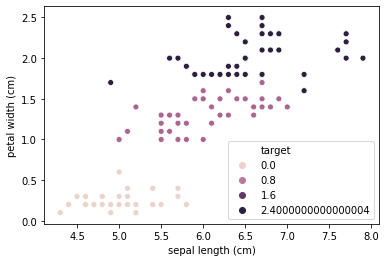

In [44]:
print("Without Scalling")
sns.scatterplot(x=x_train['sepal length (cm)'],y=x_train['petal width (cm)'], hue=y_train)

With Scalling


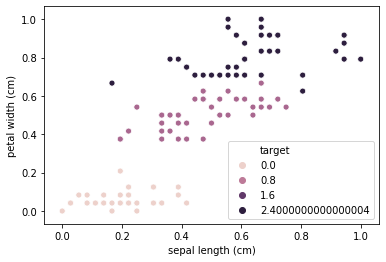

In [45]:
print("With Scalling")
sns.scatterplot(x=x_train_scaled['sepal length (cm)'],y=x_train_scaled['petal width (cm)'], hue=y_train)

In [46]:
min_test=x_test.min()

In [47]:
range_test=(x_test - min_test).max()

In [48]:
x_test_scaled=(x_test - min_test)/range_test

In [49]:
x_test_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
82,0.466667,0.230769,0.52,0.458333
134,0.566667,0.153846,0.86,0.541667
114,0.466667,0.307692,0.76,0.958333
42,0.000000,0.615385,0.00,0.041667
109,0.933333,0.923077,0.96,1.000000


Without Scalling


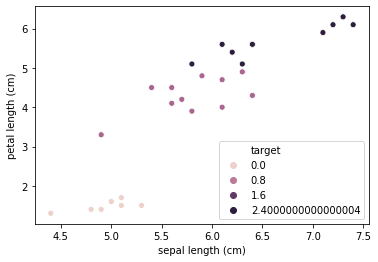

In [50]:
print("Without Scalling")
sns.scatterplot(x=x_test['sepal length (cm)'],y=x_test['petal length (cm)'], hue=y_test)

With Scalling


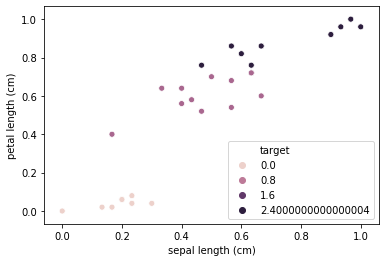

In [51]:
print("With Scalling")
sns.scatterplot(x=x_test_scaled['sepal length (cm)'],y=x_test_scaled['petal length (cm)'], hue=y_test)

In [52]:
svc_model2=SVC()

In [53]:
svc_model2.fit(x_train_scaled,y_train)

c:\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [54]:
y_predict2=svc_model2.predict(x_test_scaled)

In [55]:
cm2=confusion_matrix(y_test,y_predict2)

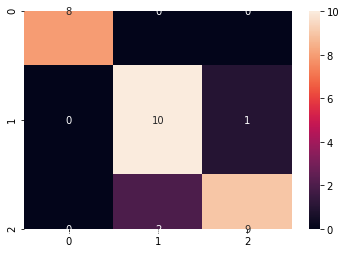

In [56]:
sns.heatmap(cm2, annot=True)

**Summary of classification report**

In [57]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.83      0.91      0.87        11
         2.0       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



### Next improvement is to tune SVC(Support vector classifier) to simply tune c and γ parameter

```To get best parameter for c and gamma sklearn provide method that kind of provide all GridSearch```

In [ ]:
paramGrid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,.001],'kernel':['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid=GridSearchCV(SVC(),paramGrid,refit=True, verbose=4)

In [ ]:
grid.fit(x_train_scaled,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid_predict= grid.predict(x_test_scaled)

In [ ]:
grid_cm = confusion_matrix(y_test, grid_predict)

In [ ]:
sns.heatmap(grid_cm, annot=True)

In [ ]:
print(classification_report(y_test,grid_predict))

**Here we have misclassification point which is actually type erro which is perfect**